In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [119]:
df = pd.read_csv('survey_results_public.csv')

In [120]:
df.shape[0] #total 51392 entries

51392

In [121]:
df.head(5)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


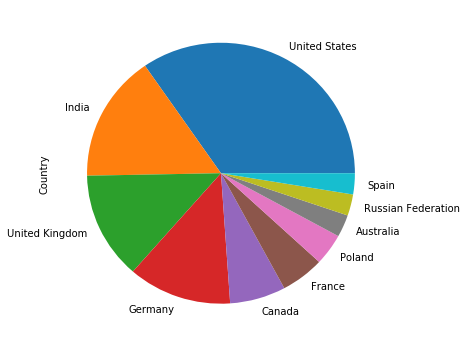

In [122]:
df['Country'].value_counts()[0:10].plot(kind='pie', figsize=(6,6))

Almost 50% of developers are from United States and India.

In [123]:
df['HaveWorkedLanguage'].dropna(inplace=True)

In [124]:
language = []
for i in df['HaveWorkedLanguage']:
    i = i.replace(" ","")
    lang = i.split(';')
    for j in lang:
        j.strip()
        language.append(j)

In [125]:
langSet = pd.Series(language)

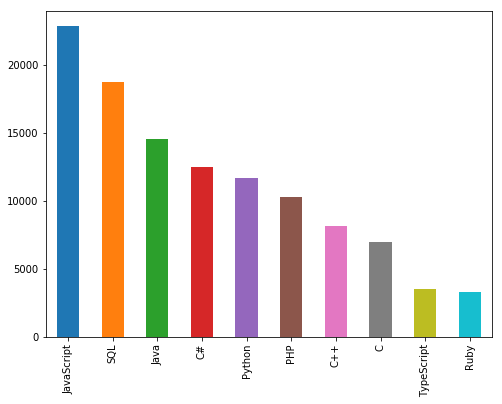

In [126]:
langSet.value_counts()[:10].plot(kind='bar', figsize=(8,6))

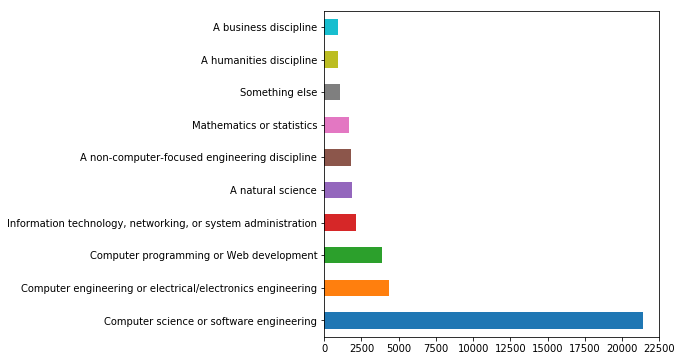

In [127]:
df['MajorUndergrad'].value_counts()[0:10].plot(kind='barh', figsize=(6,6))

In [128]:
gap=df[['Gender', 'Salary']]

In [129]:
gap.dropna(inplace=True)

/home/therochvoices/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [130]:
gap[gap['Gender'] == 'Female'].describe()

,Salary
count,819.000000
mean,58083.924534
std,38607.488222
min,0.000000
25%,31250.000000
50%,52500.000000
75%,83000.000000
max,195000.000000


In [131]:
gap[gap['Gender'] == 'Male'].describe()

,Salary
count,10666.000000
mean,56996.494293
std,39722.918323
min,0.000000
25%,27262.626263
50%,50537.634409
75%,80000.000000
max,197000.000000


# Average salary of Men is 56996 whereas that of Women is 58083

In [132]:
exp = df[['Gender', 'ExpectedSalary']]

In [133]:
exp.dropna(inplace=True)


/home/therochvoices/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [134]:
exp[exp['Gender'] == 'Male'].describe()

,ExpectedSalary
count,1890.000000
mean,33786.512090
std,29798.941353
min,0.000000
25%,5840.410494
50%,30107.526882
75%,52180.024000
max,187500.000000


In [135]:
exp[exp['Gender'] == 'Female'].describe()

,ExpectedSalary
count,159.000000
mean,29830.759637
std,29389.372370
min,0.044046
25%,1956.196728
50%,22500.000000
75%,45845.552297
max,150000.000000


# Men expect 33786 (average) whereas Women 29830.

In [136]:
ind = df[['Country', 'Salary']]

In [138]:
ind.dropna(inplace=True)

/home/therochvoices/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [147]:
ind[ind['Country'] == 'India'].describe()


,Salary
count,821.000000
mean,10318.860802
std,12061.448951
min,0.000000
25%,3523.711643
50%,7047.423286
75%,13213.918661
max,163134.796652


In [148]:
ind[ind['Country'] == 'United States'].describe()

,Salary
count,3781.000000
mean,96194.754635
std,34866.067035
min,5.000000
25%,70000.000000
50%,93000.000000
75%,120000.000000
max,197000.000000
